## Problem Understanding and Definition
<b>Number of attributes:</b> 4,233 rows and 25 columns 

<b><u>Feature Information:</b></u>
* <b>name</b> - player's name
* <b>pos</b> - player's position
* <b>height</b> - player's height
* <b>weight</b> - player's weight
* <b>year</b> - basketball season year
* <b>age</b> - player's age
* <b>g</b> - games played
* <b>mp</b> - minutes played
* <b>fg</b> - fields goal
* <b>fga</b> - fields goal attempted
* <b>3p</b> - 3-point field goal
* <b>3pa</b> - 3-point field goal attempted
* <b>2p</b> - 2-point field goal
* <b>2pa</b> - 2-point field goal attempted
* <b>ft</b> - free throws
* <b>fta</b> - free throws attempted
* <b>orb</b> - offensive rebounds
* <b>drb</b> - defensive rebounds
* <b>trb</b> - total rebounds
* <b>ast</b> - assists
* <b>stl</b> - steals
* <b>blk</b> - blocks
* <b>tov</b> - turnovers
* <b>pf</b> - personal fouls
* <b>pts</b> - total points per game

### Goal: 
Predict players' position (Guard, Forward, or Center) based on their stats.

In [1]:
# loading important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

In [2]:
# reading the dataset
DATA_DIR = 'archive/'
FILE_NAME = 'nba_player_stats.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
nba = pd.read_csv(data_path, index_col=[0])

In [3]:
nba.columns

Index(['name', 'pos', 'height', 'weight', 'year', 'age', 'g', 'mp', 'fg',
       'fga', '3p', '3pa', '2p', '2pa', 'ft', 'fta', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [4]:
nba.shape

(4233, 25)

## Feature Engineering

In [5]:
#identify numerical and categorical features
numerical_features = ['height', 'weight', 'year', 'age', 'g', 'mp', 'fg',
       'fga', '3p', '3pa', '2p', '2pa', 'ft', 'fta', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
categorical_features = ['pos']

In [6]:
#number of players per position - unbalanced 
feature = categorical_features[0]
count = nba[feature].value_counts()
count

G    1767
F    1718
C     748
Name: pos, dtype: int64

### Correlation Analysis

In [7]:
#correlation matrix of numerical features
cor_matrix = nba[numerical_features].corr().abs()
cor_matrix

,height,weight,year,age,g,mp,fg,fga,3p,3pa,...,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts
height,1.000000,0.836603,0.215404,0.036561,0.025050,0.010415,0.014643,0.100706,0.155555,0.167112,...,0.003281,0.481643,0.377990,0.392869,0.430850,0.103486,0.485760,0.025468,0.143321,0.036525
weight,0.836603,1.000000,0.283355,0.034703,0.007107,0.010272,0.019164,0.099070,0.121014,0.131151,...,0.013565,0.456677,0.361342,0.362810,0.383377,0.101016,0.414400,0.031570,0.127538,0.033736
year,0.215404,0.283355,1.000000,0.125843,0.057721,0.172469,0.063741,0.017859,0.478942,0.516908,...,0.155184,0.277356,0.424555,0.036522,0.005662,0.353894,0.286684,0.385546,0.226133,0.074198
age,0.036561,0.034703,0.125843,1.000000,0.303200,0.274677,0.253458,0.257454,0.049147,0.030614,...,0.249257,0.158632,0.164855,0.188994,0.276034,0.213207,0.091897,0.180239,0.300172,0.256310
g,0.025050,0.007107,0.057721,0.303200,1.000000,0.711511,0.688388,0.666435,0.249468,0.225324,...,0.580131,0.403023,0.494356,0.583816,0.511574,0.485222,0.340291,0.447427,0.638307,0.680354
mp,0.010415,0.010272,0.172469,0.274677,0.711511,1.000000,0.867834,0.846147,0.459305,0.460129,...,0.698360,0.504297,0.677656,0.722515,0.657619,0.681857,0.427866,0.675137,0.654648,0.866777
fg,0.014643,0.019164,0.063741,0.253458,0.688388,0.867834,1.000000,0.974497,0.437239,0.429582,...,0.808082,0.475350,0.637811,0.677235,0.653110,0.616841,0.389027,0.664550,0.646506,0.990418
fga,0.100706,0.099070,0.017859,0.257454,0.666435,0.846147,0.974497,1.000000,0.462875,0.462263,...,0.815006,0.363265,0.544100,0.624605,0.681355,0.574750,0.296793,0.605432,0.651369,0.975901
3p,0.155555,0.121014,0.478942,0.049147,0.249468,0.459305,0.437239,0.462875,1.000000,0.983574,...,0.176181,0.003160,0.330691,0.106078,0.405691,0.435437,0.078930,0.419803,0.072135,0.493168
3pa,0.167112,0.131151,0.516908,0.030614,0.225324,0.460129,0.429582,0.462263,0.983574,1.000000,...,0.171417,0.001202,0.335310,0.096509,0.413330,0.454969,0.078338,0.441903,0.057611,0.484929


In [8]:
#remove all correlations of 1 or duplicates
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

/var/folders/f7/f93qrv5d03d55cxtc92_2zq40000gn/T/ipykernel_35225/3874229295.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


,height,weight,year,age,g,mp,fg,fga,3p,3pa,...,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts
height,NaN,0.836603,0.215404,0.036561,0.025050,0.010415,0.014643,0.100706,0.155555,0.167112,...,0.003281,0.481643,0.377990,0.392869,0.430850,0.103486,0.485760,0.025468,0.143321,0.036525
weight,NaN,NaN,0.283355,0.034703,0.007107,0.010272,0.019164,0.099070,0.121014,0.131151,...,0.013565,0.456677,0.361342,0.362810,0.383377,0.101016,0.414400,0.031570,0.127538,0.033736
year,NaN,NaN,NaN,0.125843,0.057721,0.172469,0.063741,0.017859,0.478942,0.516908,...,0.155184,0.277356,0.424555,0.036522,0.005662,0.353894,0.286684,0.385546,0.226133,0.074198
age,NaN,NaN,NaN,NaN,0.303200,0.274677,0.253458,0.257454,0.049147,0.030614,...,0.249257,0.158632,0.164855,0.188994,0.276034,0.213207,0.091897,0.180239,0.300172,0.256310
g,NaN,NaN,NaN,NaN,NaN,0.711511,0.688388,0.666435,0.249468,0.225324,...,0.580131,0.403023,0.494356,0.583816,0.511574,0.485222,0.340291,0.447427,0.638307,0.680354
mp,NaN,NaN,NaN,NaN,NaN,NaN,0.867834,0.846147,0.459305,0.460129,...,0.698360,0.504297,0.677656,0.722515,0.657619,0.681857,0.427866,0.675137,0.654648,0.866777
fg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.974497,0.437239,0.429582,...,0.808082,0.475350,0.637811,0.677235,0.653110,0.616841,0.389027,0.664550,0.646506,0.990418
fga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462875,0.462263,...,0.815006,0.363265,0.544100,0.624605,0.681355,0.574750,0.296793,0.605432,0.651369,0.975901
3p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.983574,...,0.176181,0.003160,0.330691,0.106078,0.405691,0.435437,0.078930,0.419803,0.072135,0.493168
3pa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.171417,0.001202,0.335310,0.096509,0.413330,0.454969,0.078338,0.441903,0.057611,0.484929


In [9]:
#identify features with over 95% correlation to remove from data before modeling
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print()
print(to_drop) #dropping FGA, 3PA, 2P, 2PA, FTA, and PTS


['fga', '3pa', '2p', '2pa', 'fta', 'pts']


In [10]:
#correlation plot of over 95% correlation variables and some they were correlated with
high_cor_matrix = nba[['fga', '3pa', '2p', '2pa', 'fta', 'pts', 'fg','3p']].corr().abs()
high_cor_matrix

,fga,3pa,2p,2pa,fta,pts,fg,3p
fga,1.000000,0.462263,0.924986,0.932417,0.815006,0.975901,0.974497,0.462875
3pa,0.462263,1.000000,0.167685,0.110943,0.171417,0.484929,0.429582,0.983574
2p,0.924986,0.167685,1.000000,0.968610,0.830571,0.933013,0.960772,0.171159
2pa,0.932417,0.110943,0.968610,1.000000,0.842775,0.896098,0.917272,0.118169
fta,0.815006,0.171417,0.830571,0.842775,1.000000,0.850015,0.808082,0.176181
pts,0.975901,0.484929,0.933013,0.896098,0.850015,1.000000,0.990418,0.493168
fg,0.974497,0.429582,0.960772,0.917272,0.808082,0.990418,1.000000,0.437239
3p,0.462875,0.983574,0.171159,0.118169,0.176181,0.493168,0.437239,1.000000


In [11]:
#create nba1 dataframe for modeling with correlated columns removed
nba1 = nba.drop(columns = ['fga', '3pa', '2p', '2pa', 'fta', 'pts'], axis=1)
nba1

,name,pos,height,weight,year,age,g,mp,fg,3p,ft,orb,drb,trb,ast,stl,blk,tov,pf
835,D.C. Wilcutt,G,74.0,165.0,1950.0,26.0,37.0,0.0,0.600000,0.0,0.800000,0.0,0.0,0.0,1.300000,0.0,0.0,0.0,0.7
321,Bill Roberts,C,81.0,210.0,1950.0,24.0,67.0,0.0,1.100000,0.0,0.400000,0.0,0.0,0.0,0.400000,0.0,0.0,0.0,1.3
2801,Marshall Hawkins,F,75.0,205.0,1950.0,25.0,39.0,0.0,1.400000,0.0,1.100000,0.0,0.0,0.0,1.300000,0.0,0.0,0.0,2.2
1402,Floyd Volker,C,76.0,205.0,1950.0,28.0,36.0,0.0,2.633333,0.0,1.133333,0.0,0.0,0.0,1.766667,0.0,0.0,0.0,2.9
2812,Marv Schatzman,F,77.0,200.0,1950.0,22.0,34.0,0.0,1.300000,0.0,0.900000,0.0,0.0,0.0,1.100000,0.0,0.0,0.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,Nate Hinton,G,75.1,190.1,2021.0,21.0,21.0,4.4,0.700000,0.2,0.300000,0.0,0.4,0.4,0.400000,0.3,0.1,0.2,0.4
3050,Nathan Knight,F,79.9,220.4,2021.0,23.0,33.0,8.5,1.100000,0.2,1.300000,0.8,1.4,2.2,0.200000,0.3,0.3,0.5,0.7
3072,Nick Richards,F,79.9,220.4,2021.0,23.0,18.0,3.5,0.200000,0.0,0.400000,0.2,0.4,0.6,0.100000,0.0,0.0,0.2,0.4
1612,Greg Whittington,F,79.9,220.4,2021.0,27.0,4.0,3.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [12]:
nba1.columns

Index(['name', 'pos', 'height', 'weight', 'year', 'age', 'g', 'mp', 'fg', '3p',
       'ft', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf'],
      dtype='object')

In [23]:
#identify features and target for modeling also removed 'name' from features
features = ['height', 'weight','age', 'g', 'mp', 'fg', '3p',
       'ft', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']
target = ['pos']

In [24]:
#create dataframe df for modeling
df = nba1[features + target]

### Train-Test-Split

In [25]:
#80/20 split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=20, random_state=42)
print(df.shape, train.shape, test.shape)

(4233, 17) (4213, 17) (20, 17)


### Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression

#model
LM_model = LogisticRegression(penalty='l2', max_iter=500, multi_class='ovr', solver='liblinear')
LM_model.fit(train[features],train['pos'])


LogisticRegression(max_iter=500, multi_class='ovr', solver='liblinear')

In [27]:
#prediction
LM_pred_prob = pd.DataFrame(LM_model.predict_proba(test[features]))
LM_pred = pd.DataFrame(LM_model.predict(test[features]))
LM_pred = pd.concat([test.reset_index()['pos'],LM_pred_prob,LM_pred],axis=1, ignore_index=True)

print(LM_pred.shape)

LM_pred.columns = ['Actual','Y_prob F', 'Y_prob C', 'Y_prob G', 'Y_pred']
LM_pred

(20, 5)


,Actual,Y_prob F,Y_prob C,Y_prob G,Y_pred
0,G,0.009205,0.095683,0.895112,G
1,F,0.003015,0.324062,0.672922,G
2,F,0.001848,0.955567,0.042585,F
3,F,0.240741,0.548749,0.210510,F
4,F,0.125383,0.662302,0.212315,F
5,G,0.000073,0.043818,0.956108,G
6,G,0.022553,0.359055,0.618392,G
7,G,0.002764,0.269976,0.727260,G
8,F,0.020419,0.902931,0.076650,F
9,G,0.002995,0.202278,0.794727,G


In [28]:
#statistic of Actual vs Prediction 

#For prediction of Center, 50% were Center, 50% were F, 0% were Guard
#For prediction of Forward, 12% were Center, 62% were F, 25% were Guard
#For prediction of Guard, 20% were F, 80% were Guard 

pd.crosstab(LM_pred['Y_pred'],LM_pred['Actual']) 
pd.crosstab(LM_pred['Y_pred'],LM_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,C,F,G
Y_pred,,,
C,1.0,0.00,0.00
F,0.1,0.70,0.20
G,0.0,0.11,0.89


<b>LogReg Results:</b> <br>
* For prediction of Center, 100%
* For prediction of Forward, 10% were Center, 70% were F, 20% were Guard
* For prediction of Guard, 11% were F, 89% were Guard 

### Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Modeling
dt_model = DecisionTreeClassifier(random_state=0, max_depth=3).fit(train[features],train['pos'])

# Prediction
def Prediction(model):
    pred_prob = pd.DataFrame(model.predict_proba(test[features]))
    pred = pd.DataFrame(model.predict(test[features]))
    pred = pd.concat([test.reset_index()['pos'],pred_prob,pred],axis=1, ignore_index=True)
    pred.columns = ['Actual','Y_prob F', 'Y_prob C', 'Y_prob G', 'Y_pred']
    return(pred)
dt_pred = Prediction(dt_model)  

# Actual vs. Prediction
pd.crosstab(dt_pred['Y_pred'],dt_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,C,F,G
Y_pred,,,
C,0.33,0.67,0.00
F,0.00,0.75,0.25
G,0.00,0.10,0.90


<b>Decision Tree Results:</b> <br>
* For prediction of Center, 33% were Center, 67% were F
* For prediction of Forward, 75% were F, 25% were Guard
* For prediction of Guard, 10% were F, 90% were Guard 

-- DT better accuaracy for guard, less accuracy for center/forward than logreg

### Decision Tree Graph

In [30]:
#from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from six import StringIO

In [31]:
dot_data = StringIO()
export_graphviz(decision_tree=dt_model,
out_file=dot_data,
filled=True,
rounded=True,
feature_names = train[features].columns,
class_names = ['C','F','G'],
special_characters=True)

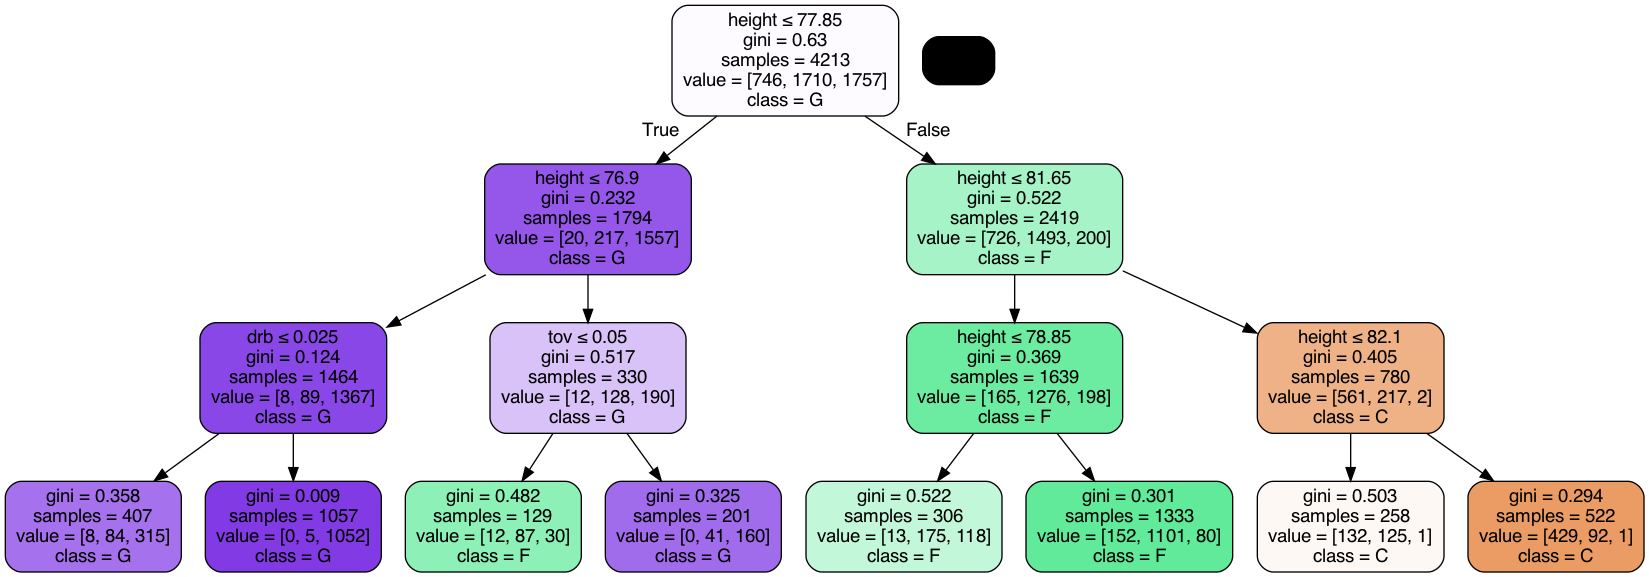

In [32]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<b>Decision Tree Graph findings:</b>
* features for splitting tree: height, defensive rebounds, turnovers 

### K-Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=6).fit(train[features],train['pos'])
KNN_pred = Prediction(KNN_model)    
pd.crosstab(KNN_pred['Y_pred'],KNN_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,C,F,G
Y_pred,,,
C,1.0,0.00,0.00
F,0.0,0.78,0.22
G,0.0,0.11,0.89


<b>KNeighbors Results:</b> <br>
* For prediction of Center, 100%
* For prediction of Forward, 78% F, 22% G
* For prediction of Guard, 11% F, 89% G

-- best so far

### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Modeling
rf_model = RandomForestClassifier(max_depth=8, random_state=0).fit(train[features],train['pos'])

# Prediction
def Prediction(model):
    pred_prob = pd.DataFrame(model.predict_proba(test[features]))
    pred = pd.DataFrame(model.predict(test[features]))
    pred = pd.concat([test.reset_index()['pos'],pred_prob,pred],axis=1, ignore_index=True)
    pred.columns = ['Actual','Y_prob F', 'Y_prob C', 'Y_prob G', 'Y_pred']
    return(pred)
rf_pred = Prediction(rf_model)  

# Actual vs. Prediction
pd.crosstab(rf_pred['Y_pred'],rf_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,C,F,G
Y_pred,,,
C,0.33,0.67,0.00
F,0.14,0.71,0.14
G,0.00,0.10,0.90


<b>Random Forest Results:</b> <br>
* For prediction of Center, 33% C, 67% F
* For prediction of Forward, 14% C, 71% F, 14% G
* For prediction of Guard,10% F, 90% G


### Linear Discriminant Analysis 

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
disc_model = LinearDiscriminantAnalysis().fit(train[features],train['pos'])
disc_pred = Prediction(disc_model)    
pd.crosstab(disc_pred['Y_pred'],disc_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,C,F,G
Y_pred,,,
C,0.33,0.67,0.00
F,0.14,0.71,0.14
G,0.00,0.10,0.90


<b>LDA Results:</b> <br>
* For prediction of Center, 33% C, 67% F
* For prediction of Forward, 14% C, 71% F, 14% G
* For prediction of Guard, 10% F 90% G

Forward most difficult to predict, no confusion between C and G

### Naive Bayes

In [36]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB().fit(train[features],train['pos'])
NB_pred = Prediction(NB_model)    
pd.crosstab(NB_pred['Y_pred'],NB_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,C,F,G
Y_pred,,,
C,0.33,0.67,0.00
F,0.14,0.71,0.14
G,0.00,0.10,0.90


### Gaussian Mixture 

In [37]:
from sklearn.mixture import GaussianMixture
GMM_model = GaussianMixture(n_components=3, random_state=1,max_iter=100).fit(train[features],train['pos'])
GMM_pred = Prediction(GMM_model)    
pd.crosstab(GMM_pred['Y_pred'],GMM_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,C,F,G
Y_pred,,,
0,0.07,0.43,0.5
1,0.00,0.00,1.0
2,0.20,0.40,0.4


In [38]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC(max_iter=3000).fit(train[features],train['pos'])
svm_pred = Prediction(dt_model)    
pd.crosstab(svm_pred['Y_pred'],svm_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Actual,C,F,G
Y_pred,,,
C,0.33,0.67,0.00
F,0.00,0.75,0.25
G,0.00,0.10,0.90


In [39]:
from sklearn.neural_network import MLPClassifier
NN_model = MLPClassifier(random_state=1, max_iter=300).fit(train[features],train['pos'])
NN_pred = Prediction(NN_model)    
pd.crosstab(NN_pred['Y_pred'],NN_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,C,F,G
Y_pred,,,
C,1.00,0.00,0.00
F,0.09,0.64,0.27
G,0.00,0.12,0.88


### Another way of doing one-vs-rest multi-class classification with logistic regression -- also identify variant importance

In [40]:
X = nba1[features]
y = nba1['pos']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,random_state=101)

In [42]:
# 1. Import the class you will use
from sklearn.preprocessing import StandardScaler

# 2. Create an instance of the class
scaler = StandardScaler()

# 3. Use the fit method of the instance
scaler.fit(X_train[features])

# 4. Use the transform method to perform the transformation
X_train.loc[:, features] = scaler.transform(X_train[features])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [43]:
#Import LogisticRegression() model from scikit_learn
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [44]:
#define classification model
multi_model = LogisticRegression(multi_class='ovr')

#fit model
multi_model.fit(X_train, y_train)

#make final predictions
y_pred = multi_model.predict(X_train)

In [45]:
important = pd.Series(data=multi_model.coef_[0], index=X_train.columns).sort_values(ascending=False).round(2)

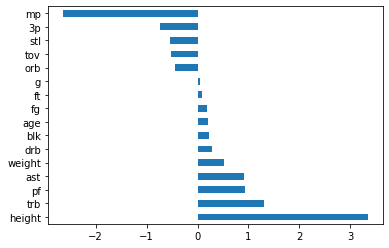

In [46]:
important.plot.barh();

In [47]:
from sklearn.metrics import accuracy_score
accuracy_log_reg = accuracy_score(y_true=y_train, y_pred=y_pred)
accuracy_log_reg

0.8444144448194397

<b> One-vs-rest Results </b> <br>74.7% accuracy for one-vs-rest log reg model. <br>
1,